In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('./RTA Dataset.csv')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\634084764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Accident_severity', data=df, order=redoslijed, palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_12856\634084764.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Lakše ozljede', 'Teške ozljede', 'Smrtne posljedice'])


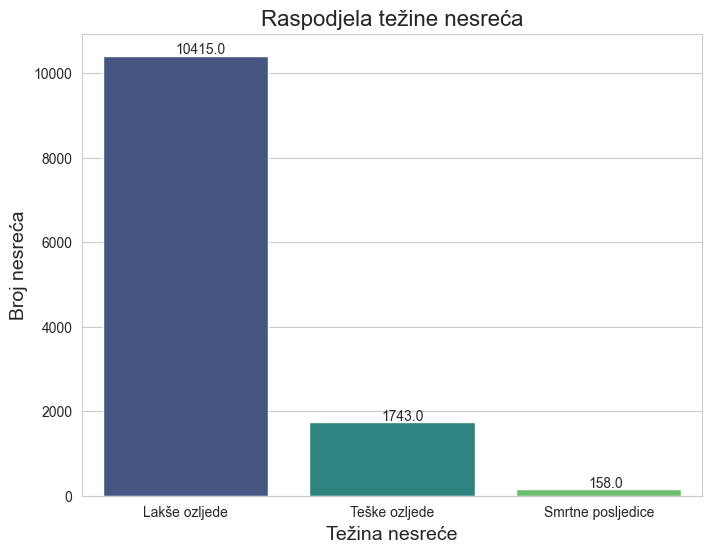

In [ ]:
plt.figure(figsize=(8, 6))

redoslijed = ['Slight Injury', 'Serious Injury', 'Fatal injury'] 
ax = sns.countplot(x='Accident_severity', data=df, order=redoslijed, palette='viridis')

plt.title('Raspodjela težine nesreća', fontsize=16)
plt.xlabel('Težina nesreće', fontsize=14)
plt.ylabel('Broj nesreća', fontsize=14)

ax.set_xticklabels(['Lakše ozljede', 'Teške ozljede', 'Smrtne posljedice'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\77670951.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_week', data=df, order=days_order, palette='muted')


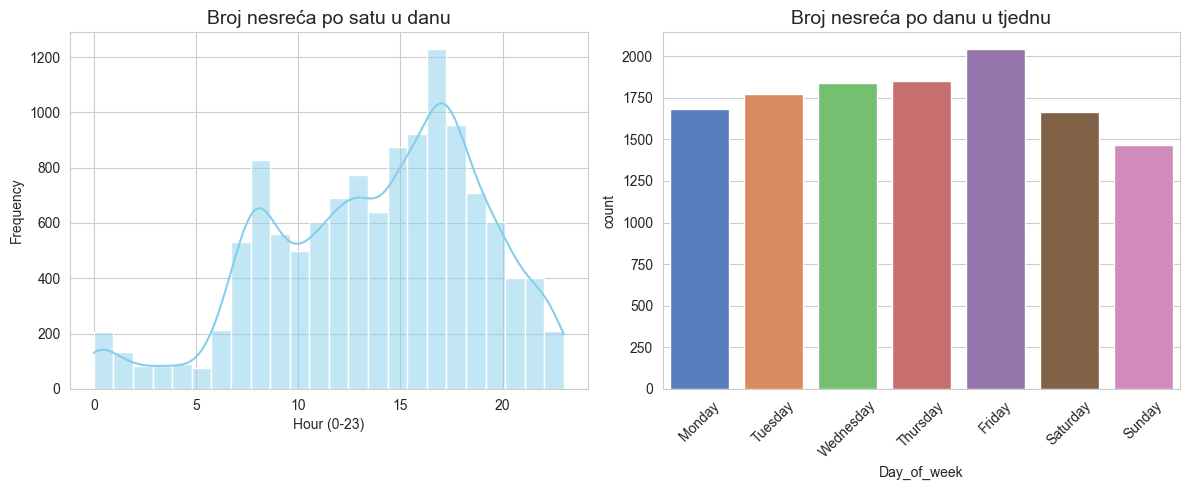

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=24, kde=True, color='skyblue')
plt.title('Broj nesreća po satu u danu', fontsize=14)
plt.xlabel('Hour (0-23)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_week', data=df, order=days_order, palette='muted')
plt.title('Broj nesreća po danu u tjednu', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\232982710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause_of_accident', data=df, order=top_causes, palette='magma')


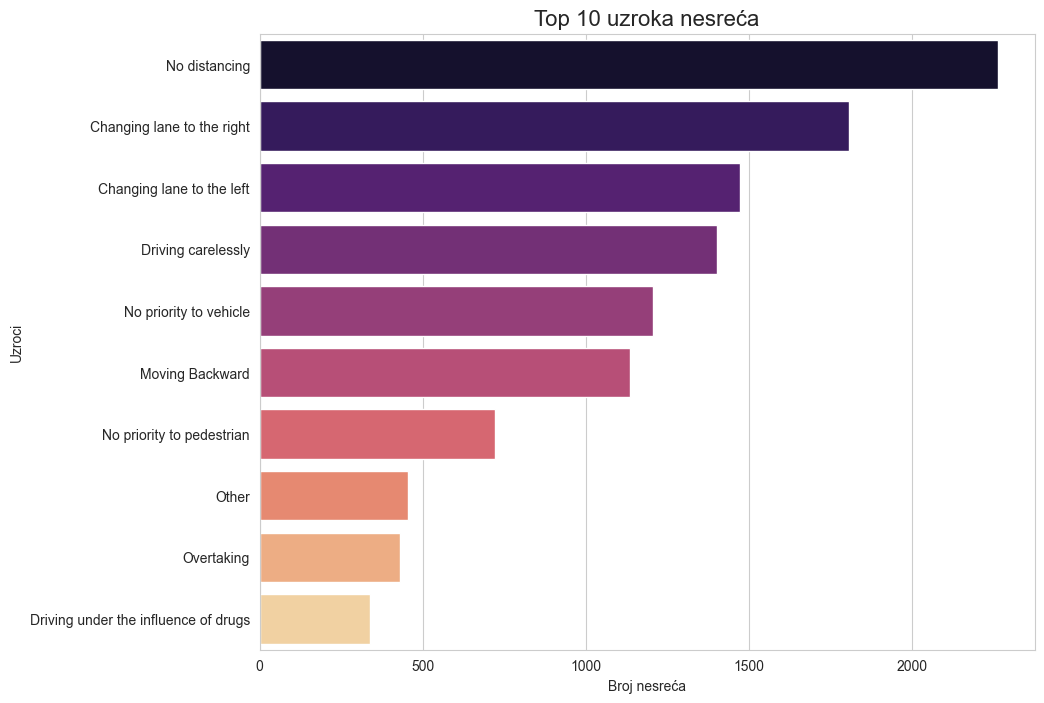

In [67]:
plt.figure(figsize=(10, 8))

top_causes = df['Cause_of_accident'].value_counts().nlargest(10).index

sns.countplot(y='Cause_of_accident', data=df, order=top_causes, palette='magma')
plt.title('Top 10 uzroka nesreća', fontsize=16)
plt.xlabel('Broj nesreća')
plt.ylabel('Uzroci')
plt.show()

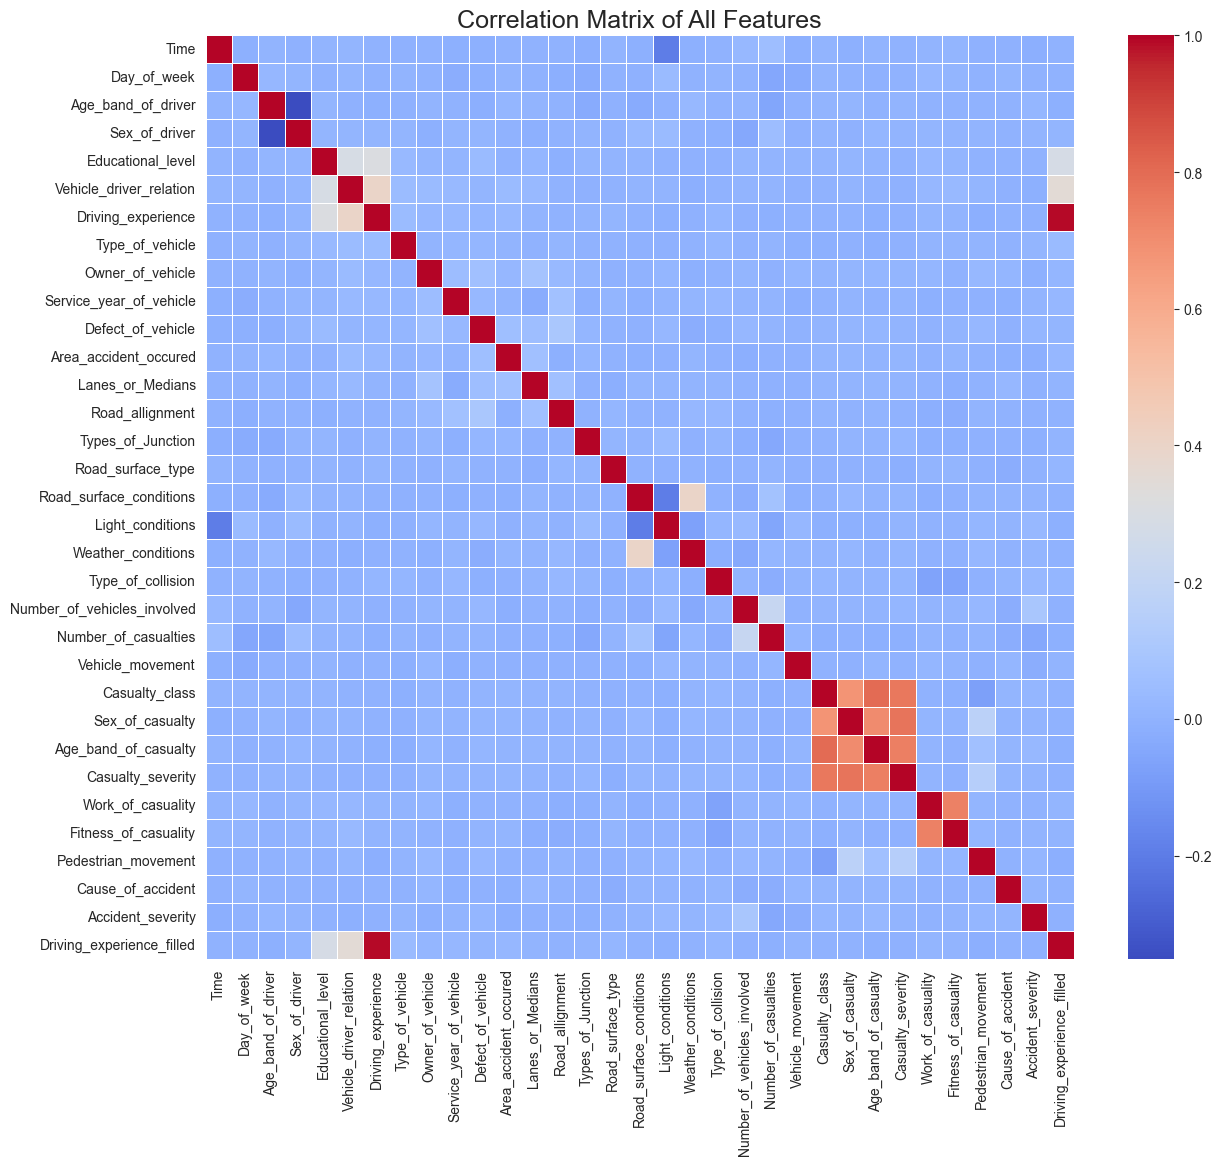

In [68]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=18)
plt.show()

<Figure size 1200x800 with 0 Axes>

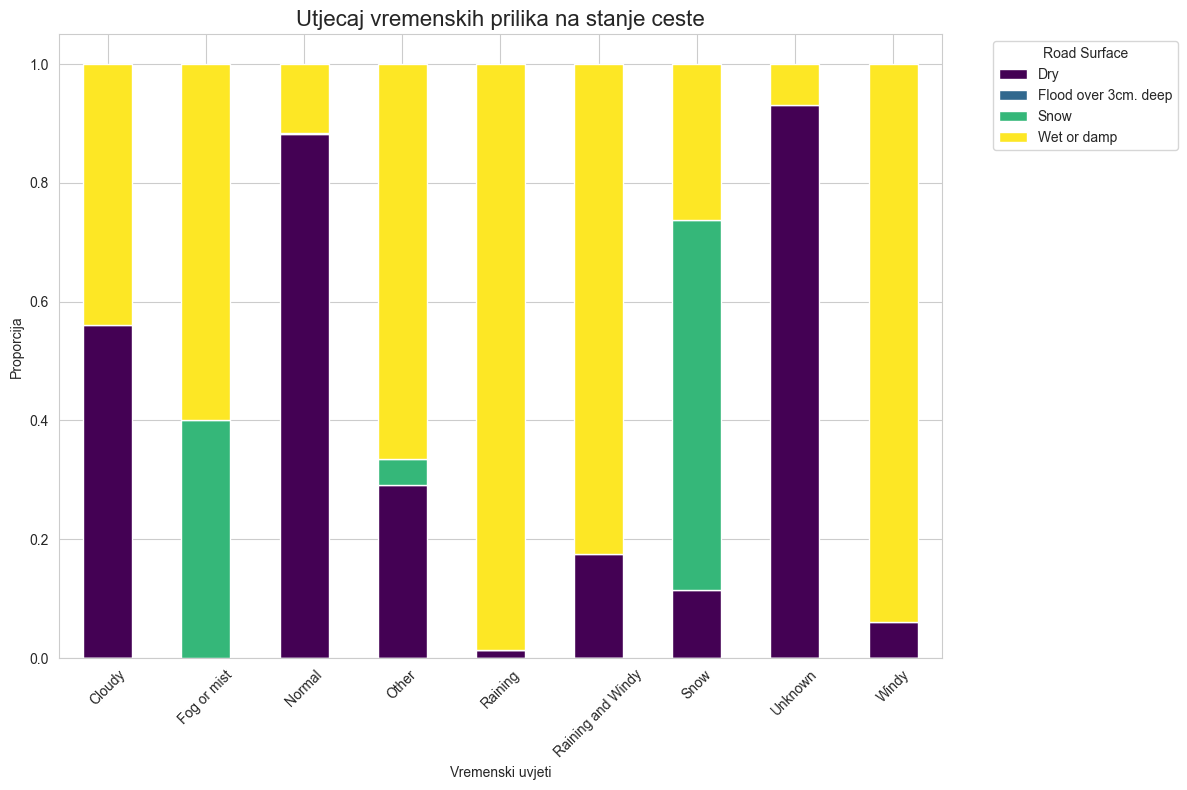

In [70]:
weather_road = pd.crosstab(df['Weather_conditions'], df['Road_surface_conditions'])

weather_road_pct = weather_road.div(weather_road.sum(1), axis=0)

plt.figure(figsize=(12, 8))
weather_road_pct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,8))

plt.title('Utjecaj vremenskih prilika na stanje ceste', fontsize=16)
plt.xlabel('Vremenski uvjeti')
plt.ylabel('Proporcija')
plt.legend(title='Road Surface', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\2614405128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Accident_severity',
C:\Users\PC\AppData\Local\Temp\ipykernel_12856\2614405128.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Lakše ozljede', 'Teške ozljede', 'Smrtne posljedice'])


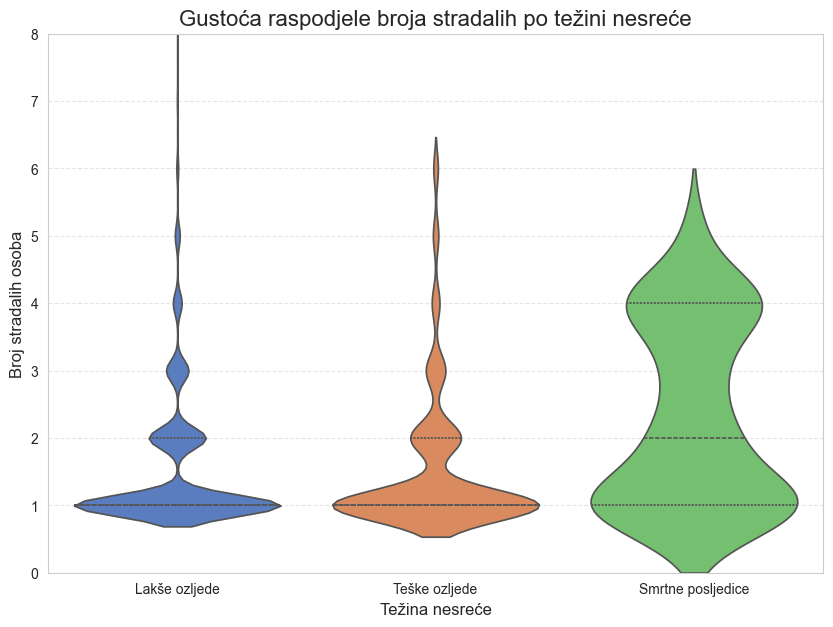

In [73]:
plt.figure(figsize=(10, 7))

redoslijed = ['Slight Injury', 'Serious Injury', 'Fatal injury']

sns.violinplot(x='Accident_severity', 
               y='Number_of_casualties', 
               data=df, 
               order=redoslijed,
               palette='muted',
               inner='quartile')

plt.title('Gustoća raspodjele broja stradalih po težini nesreće', fontsize=16)
plt.xlabel('Težina nesreće', fontsize=12)
plt.ylabel('Broj stradalih osoba', fontsize=12)

plt.gca().set_xticklabels(['Lakše ozljede', 'Teške ozljede', 'Smrtne posljedice'])

plt.ylim(0, 8) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

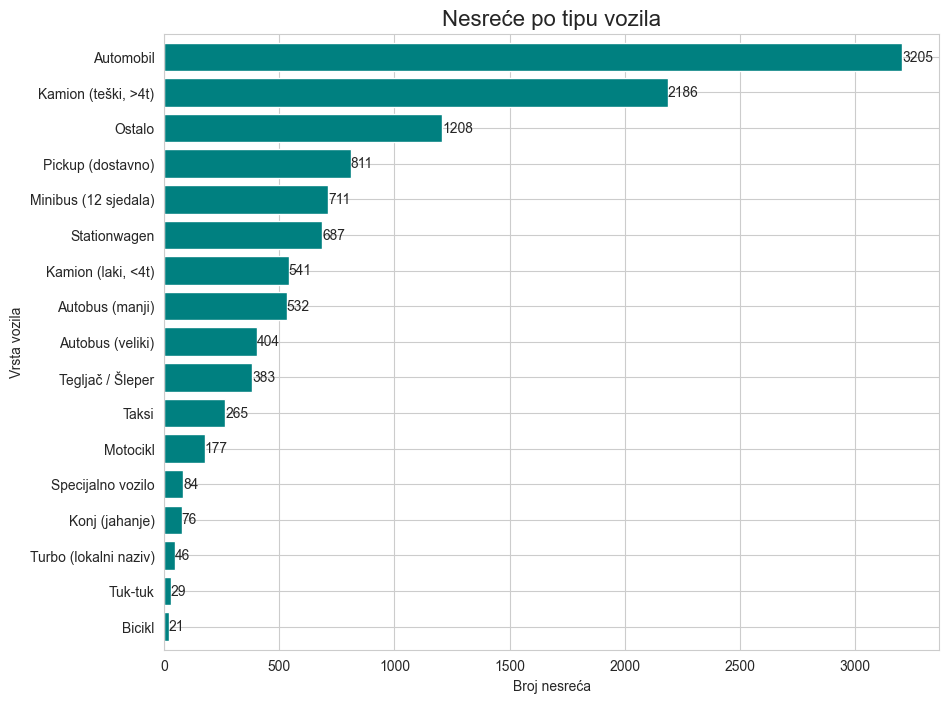

In [ ]:
plt.figure(figsize=(10, 8))

prijevodi_vozila = {
    'Lorry (11?40Q)': 'Kamion (laki, <4t)',
    'Lorry (41?100Q)': 'Kamion (teški, >4t)',
    'Automobile': 'Automobil',
    'Pick up upto 10Q': 'Pickup (dostavno)',
    'Public (12 seats)': 'Minibus (12 sjedala)',
    'Public (13?45 seats)': 'Autobus (manji)',
    'Public (> 45 seats)': 'Autobus (veliki)',
    'Long lorry': 'Tegljač / Šleper',
    'Taxi': 'Taksi',
    'Motorcycle': 'Motocikl',
    'Special vehicle': 'Specijalno vozilo',
    'Ridden horse': 'Konj (jahanje)',
    'Turbo': 'Turbo (lokalni naziv)', 
    'Bajaj': 'Tuk-tuk',
    'Bicycle': 'Bicikl',
    'Other': 'Ostalo'
}

df['Vozilo_HR'] = df['Type_of_vehicle'].map(prijevodi_vozila).fillna(df['Type_of_vehicle'])

vehicle_counts = df['Vozilo_HR'].value_counts().sort_values(ascending=True)

vehicle_counts.plot(kind='barh', color='teal', width=0.8)

plt.title('Nesreće po tipu vozila', fontsize=16)
plt.xlabel('Broj nesreća')
plt.ylabel('Vrsta vozila')

for index, value in enumerate(vehicle_counts):
    plt.text(value, index, str(value), va='center')

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\3275795948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


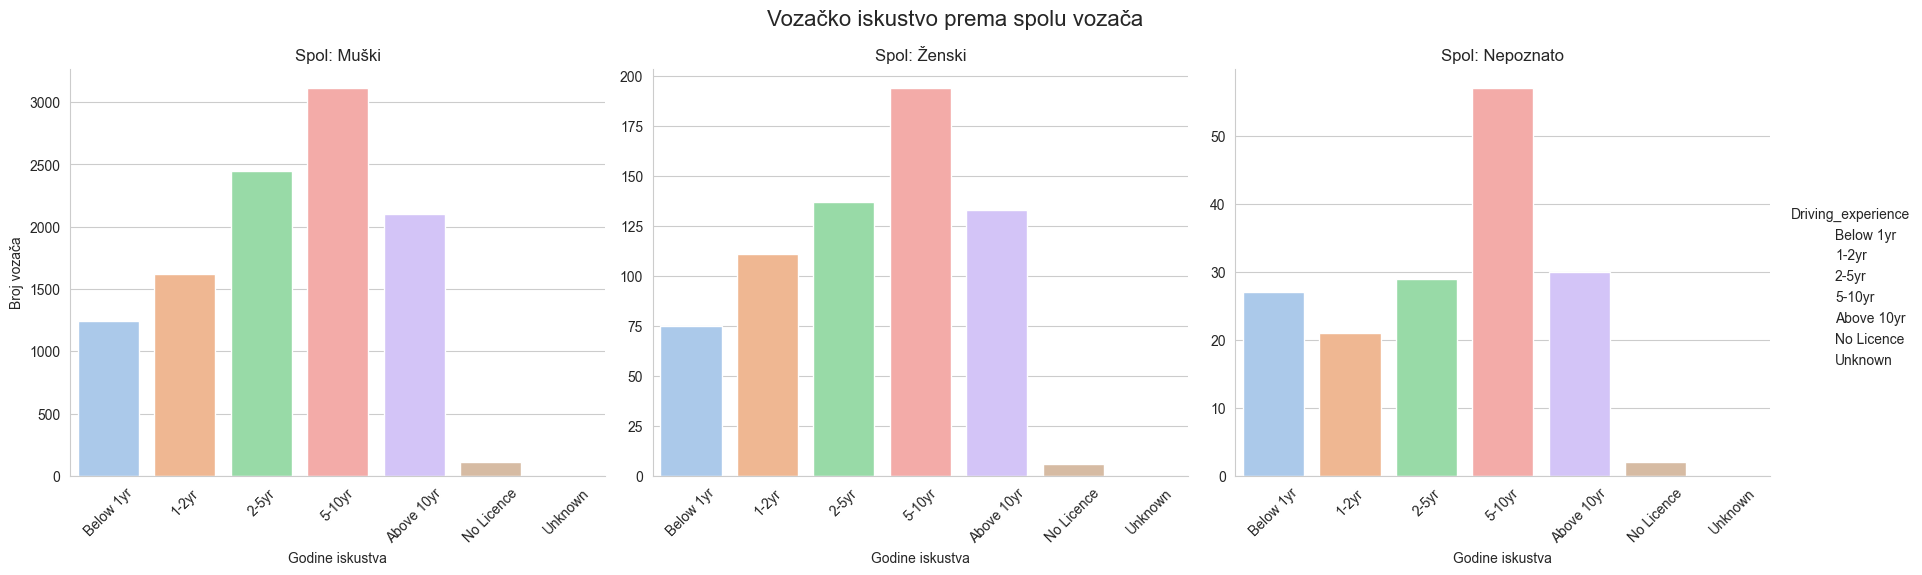

In [79]:
redoslijed = ['Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr', 'No Licence', 'Unknown']

g = sns.catplot(
    x='Driving_experience', 
    kind='count', 
    col='Sex_of_driver', 
    data=df, 
    palette='pastel',
    height=5, 
    aspect=1.2,
    sharey=False,
    order=redoslijed
)

g.fig.suptitle('Vozačko iskustvo prema spolu vozača', y=1.05, fontsize=16)

g.set_axis_labels("Godine iskustva", "Broj vozača")

g.set_xticklabels(rotation=45)

for ax in g.axes.flatten():
    naslov = ax.get_title()
    if 'Male' in naslov:
        ax.set_title('Spol: Muški')
    elif 'Female' in naslov:
        ax.set_title('Spol: Ženski')
    else:
        ax.set_title('Spol: Nepoznato')

plt.show()

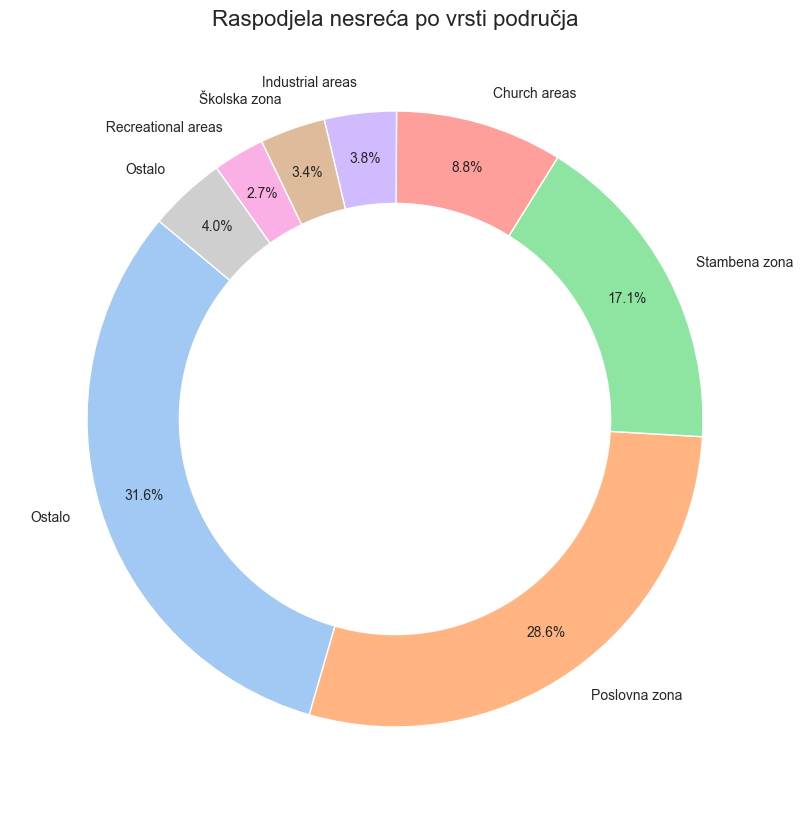

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 10)) 

prijevodi_podrucja = {
    'Office areas': 'Poslovna zona',
    'Residential areas': 'Stambena zona',
    'Church areas': 'Područje crkve',
    'Industrial areas': 'Industrijska zona',
    'School areas': 'Školska zona',
    'Recreational areas': 'Rekreacijska zona',
    'Outside rural areas': 'Izvan naselja',
    'Hospital areas': 'Bolnička zona',
    'Market areas': 'Tržnica',
    'Rural village areas': 'Seosko područje',
    'Other': 'Ostalo',
    'Unknown': 'Nepoznato'
}

area_counts = df['Area_accident_occured'].value_counts()

top_areas = area_counts.head(7)

other_count = area_counts.iloc[7:].sum()

plot_data = pd.concat([top_areas, pd.Series({'Other': other_count})])

novi_nazivi = [prijevodi_podrucja.get(item, item) for item in plot_data.index]

plt.pie(plot_data, 
        labels=novi_nazivi, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'),
        pctdistance=0.85) 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Raspodjela nesreća po vrsti područja', fontsize=16)
plt.show()

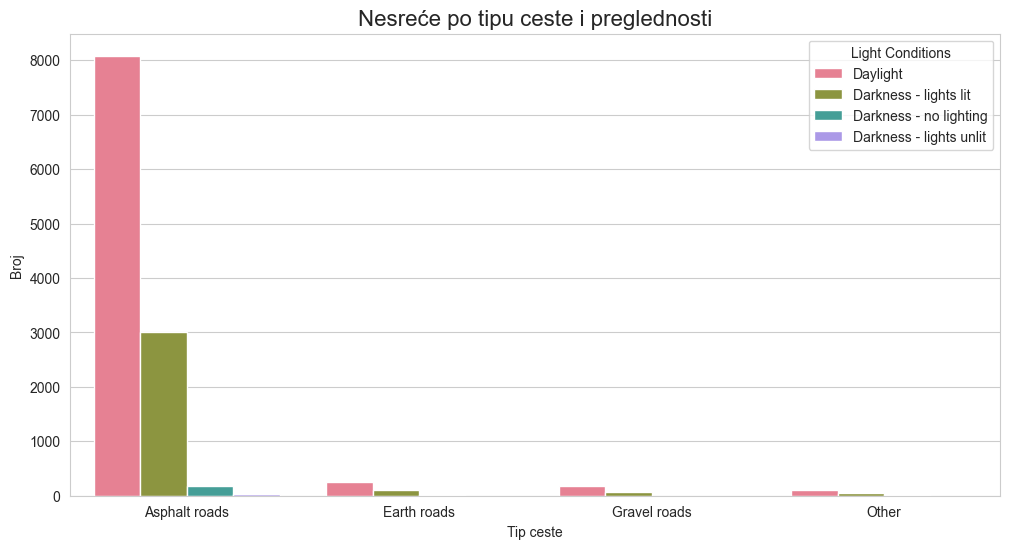

In [86]:
plt.figure(figsize=(12, 6))

top_surfaces = df['Road_surface_type'].value_counts().nlargest(4).index
df_filtered = df[df['Road_surface_type'].isin(top_surfaces)]

sns.countplot(x='Road_surface_type', hue='Light_conditions', data=df_filtered, palette='husl')

plt.title('Nesreće po tipu ceste i preglednosti', fontsize=16)
plt.xlabel('Tip ceste')
plt.ylabel('Broj')
plt.legend(title='Light Conditions')
plt.show()

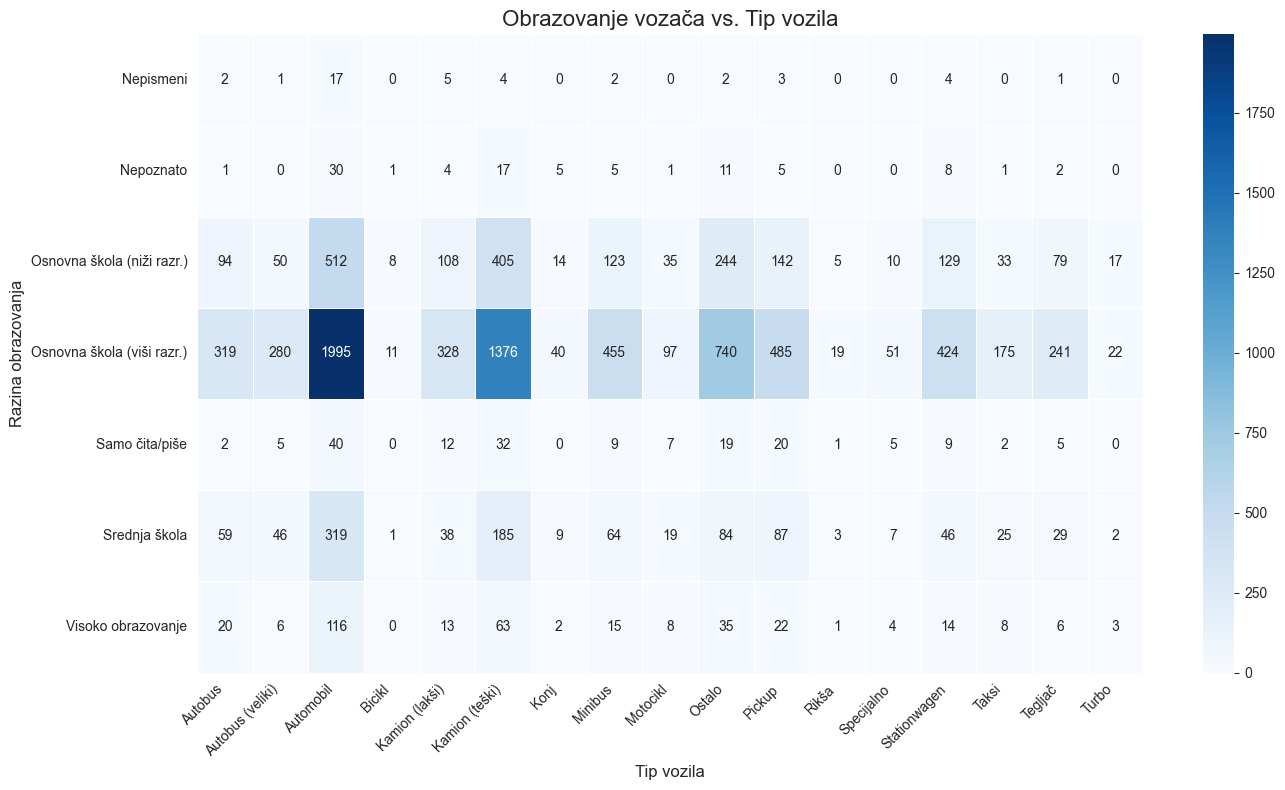

In [91]:
plt.figure(figsize=(14, 8))

obrazovanje_map = {
    'Above high school': 'Visoko obrazovanje',
    'High school': 'Srednja škola',
    'Junior high school': 'Osnovna škola (viši razr.)',
    'Elementary school': 'Osnovna škola (niži razr.)',
    'Writing & reading': 'Samo čita/piše',
    'Illiterate': 'Nepismeni',
    'Unknown': 'Nepoznato'
}

vozila_map = {
    'Automobile': 'Automobil',
    'Lorry (11?40Q)': 'Kamion (lakši)',
    'Lorry (41?100Q)': 'Kamion (teški)',
    'Public (12 seats)': 'Minibus',
    'Public (13?45 seats)': 'Autobus',
    'Public (> 45 seats)': 'Autobus (veliki)',
    'Pick up upto 10Q': 'Pickup',
    'Long lorry': 'Tegljač',
    'Taxi': 'Taksi',
    'Motorcycle': 'Motocikl',
    'Special vehicle': 'Specijalno',
    'Ridden horse': 'Konj',
    'Bajaj': 'Rikša',
    'Bicycle': 'Bicikl',
    'Turbo': 'Turbo',
    'Other': 'Ostalo'
}

edu_series = df['Educational_level'].map(obrazovanje_map).fillna(df['Educational_level'])
veh_series = df['Type_of_vehicle'].map(vozila_map).fillna(df['Type_of_vehicle'])

edu_vehicle = pd.crosstab(edu_series, veh_series)

sns.heatmap(edu_vehicle, cmap='Blues', annot=True, fmt='d', linewidths=.5)

plt.title('Obrazovanje vozača vs. Tip vozila', fontsize=16)
plt.xlabel('Tip vozila', fontsize=12)
plt.ylabel('Razina obrazovanja', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\4188850608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Spol_HR', data=drunk_df, palette='coolwarm')


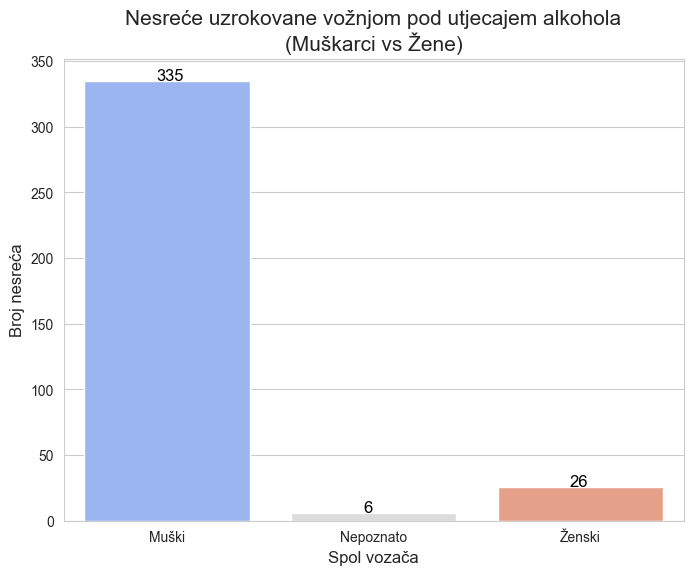

In [96]:
drunk_df = df[df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False)].copy()

drunk_df['Spol_HR'] = drunk_df['Sex_of_driver'].map({
    'Male': 'Muški', 
    'Female': 'Ženski', 
    'Unknown': 'Nepoznato'
})

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Spol_HR', data=drunk_df, palette='coolwarm')

plt.title('Nesreće uzrokovane vožnjom pod utjecajem alkohola\n(Muškarci vs Žene)', fontsize=15)
plt.xlabel('Spol vozača', fontsize=12)
plt.ylabel('Broj nesreća', fontsize=12)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + 0.35, p.get_height() + 0.2), 
                    fontsize=12, color='black')

plt.show()

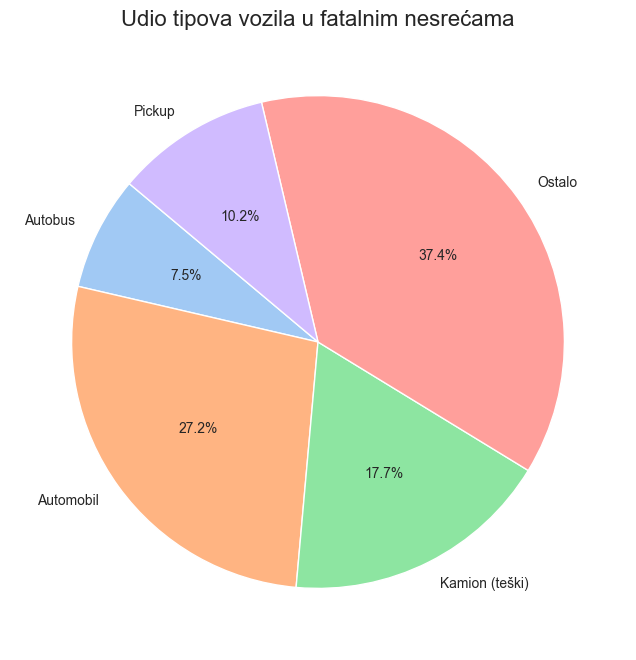

In [101]:
fatalne_nesrece = df[df['Accident_severity'].str.contains('Fatal', case=False, na=False)]
broj_vozila = fatalne_nesrece['Type_of_vehicle'].value_counts()

top_5 = broj_vozila.head(5).copy()
ostalo_broj = broj_vozila.iloc[5:].sum()

top_5['Ostalo'] = ostalo_broj

prijevodi = {
    'Automobile': 'Automobil',
    'Lorry (11?40Q)': 'Kamion (lakši)',
    'Lorry (41?100Q)': 'Kamion (teški)',
    'Pick up upto 10Q': 'Pickup',
    'Public (12 seats)': 'Minibus',
    'Public (13?45 seats)': 'Autobus',
    'Public (> 45 seats)': 'Autobus (veliki)',
    'Long lorry': 'Tegljač',
    'Taxi': 'Taksi',
    'Motorcycle': 'Motocikl',
    'Special vehicle': 'Specijalno',
    'Other': 'Ostalo'
}

top_5.rename(index=prijevodi, inplace=True)

top_5 = top_5.groupby(level=0).sum()

plt.figure(figsize=(10, 8))

plt.pie(top_5, 
        labels=top_5.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title('Udio tipova vozila u fatalnim nesrećama', fontsize=16)
plt.show()

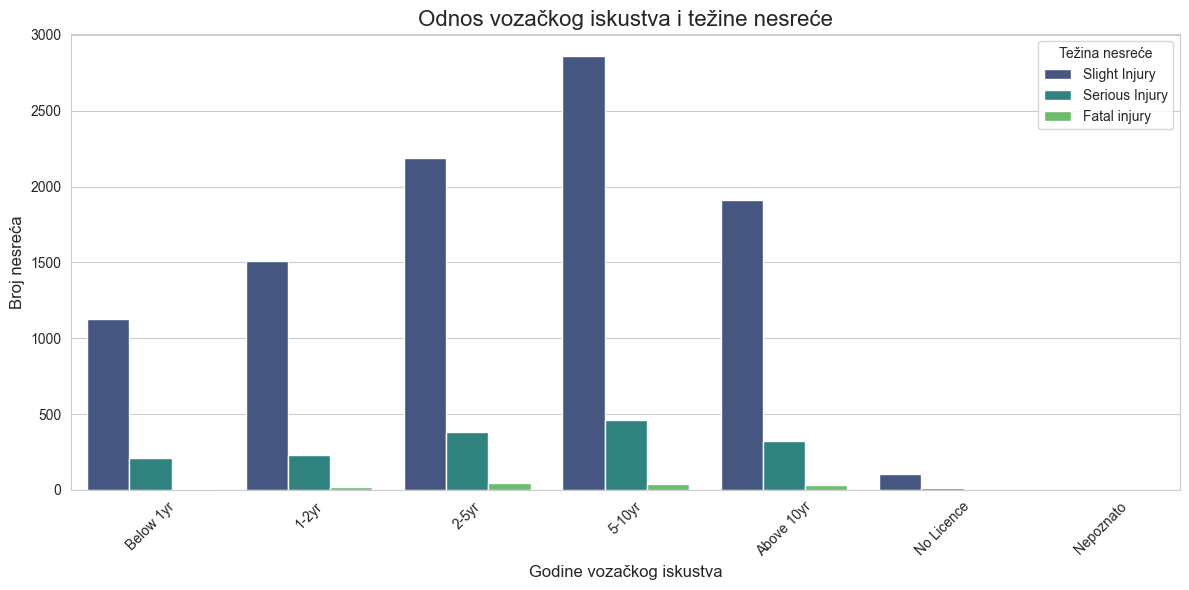

In [54]:
plt.figure(figsize=(12, 6))

redoslijed = ['Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr', 'No Licence', 'Nepoznato']

sns.countplot(x='Driving_experience', 
              hue='Accident_severity', 
              data=df, 
              order=redoslijed, 
              palette='viridis')

plt.title('Odnos vozačkog iskustva i težine nesreće', fontsize=16)
plt.xlabel('Godine vozačkog iskustva', fontsize=12)
plt.ylabel('Broj nesreća', fontsize=12)
plt.legend(title='Težina nesreće')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12856\1966049162.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_12856\1966049162.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_12856\1966049162.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


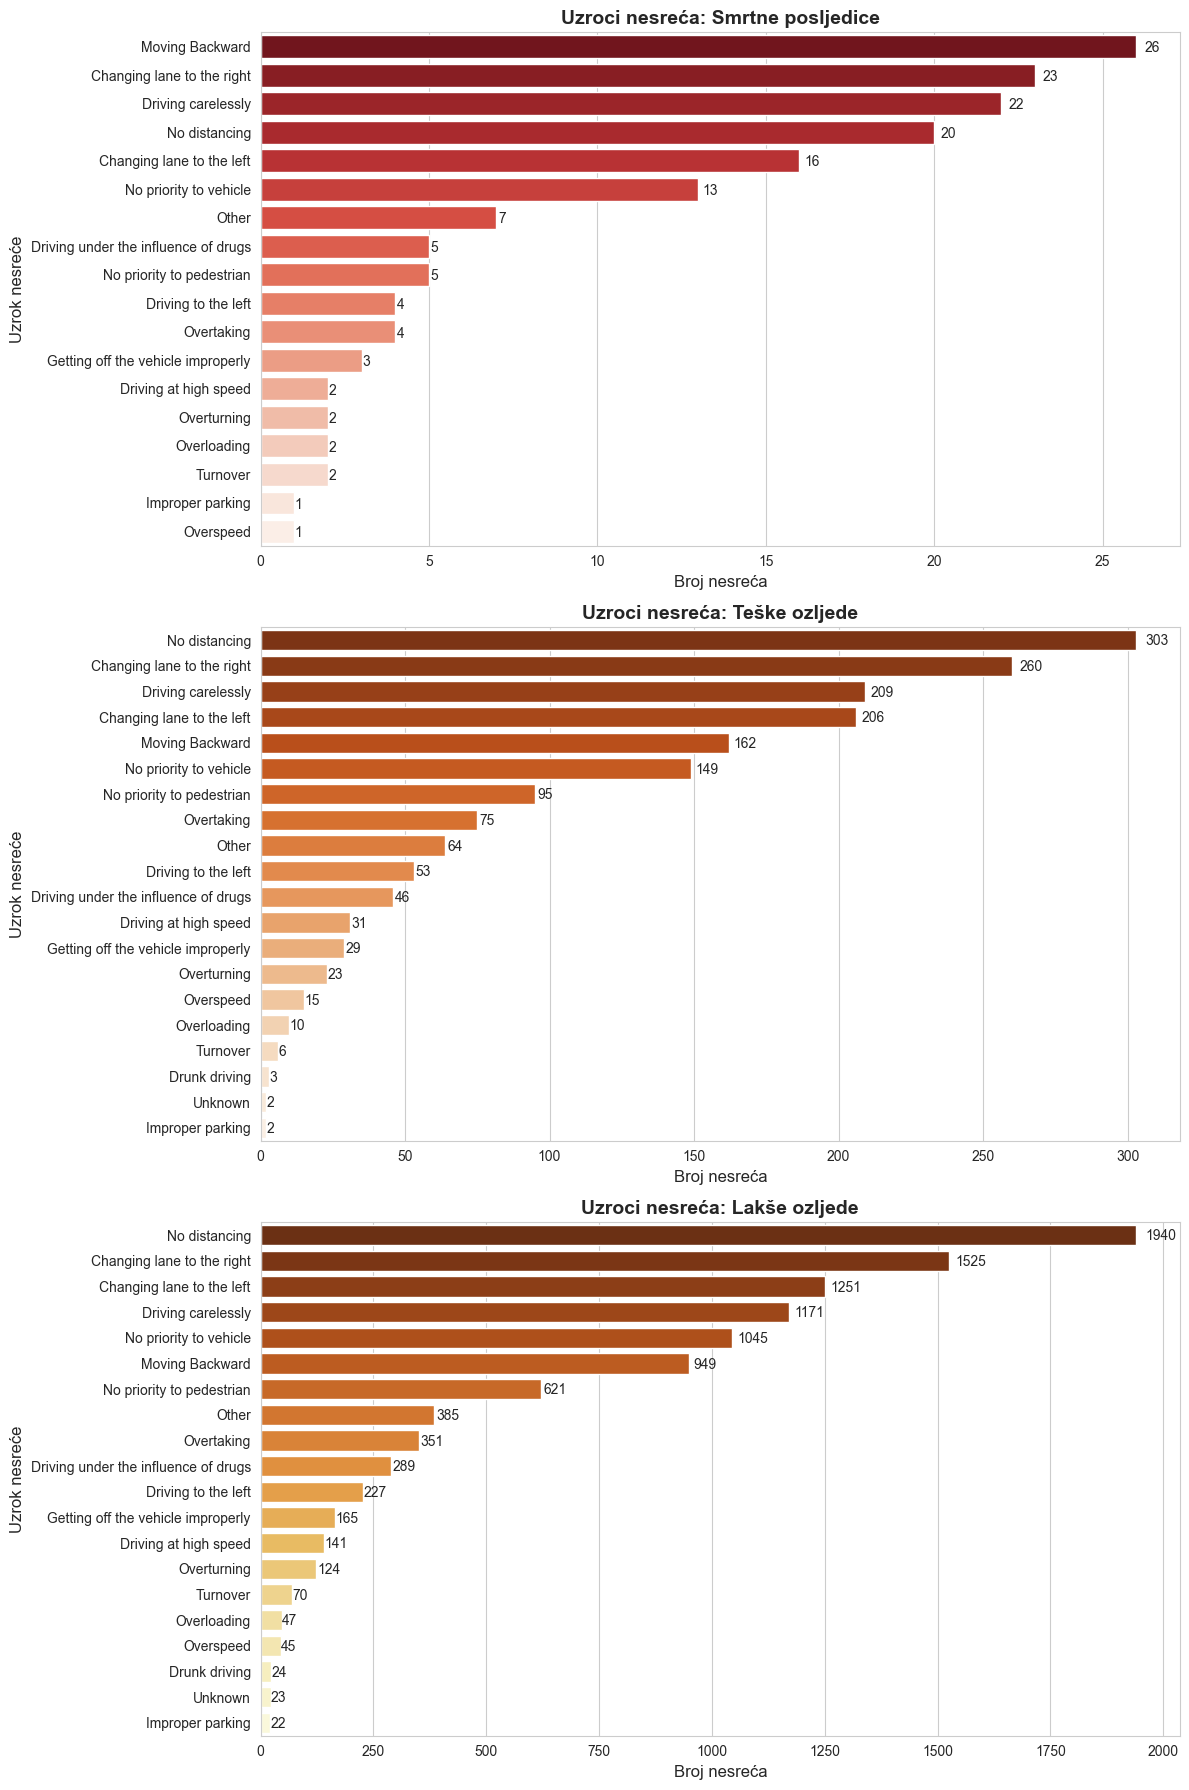

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

tipovi_ozljeda = ['Fatal injury', 'Serious Injury', 'Slight Injury']

prijevodi = {
    'Fatal injury': 'Smrtne posljedice',
    'Serious Injury': 'Teške ozljede',
    'Slight Injury': 'Lakše ozljede'
}

boje = ['Reds_r', 'Oranges_r', 'YlOrBr_r']

for i, ozljeda in enumerate(tipovi_ozljeda):
    ax = axes[i]
    
    subset = df[df['Accident_severity'] == ozljeda]
    
    poredak = subset['Cause_of_accident'].value_counts().index
    
    sns.countplot(
        data=subset,
        y="Cause_of_accident",
        order=poredak,
        ax=ax,
        palette=boje[i]
    )
    
    naslov = prijevodi.get(ozljeda, ozljeda)
    ax.set_title(f"Uzroci nesreća: {naslov}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Broj nesreća", fontsize=12)
    ax.set_ylabel("Uzrok nesreće", fontsize=12)
    
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.annotate(f'{int(width)}', 
                        (width + (width * 0.01), p.get_y() + 0.6), 
                        fontsize=10)

plt.tight_layout()
plt.show()

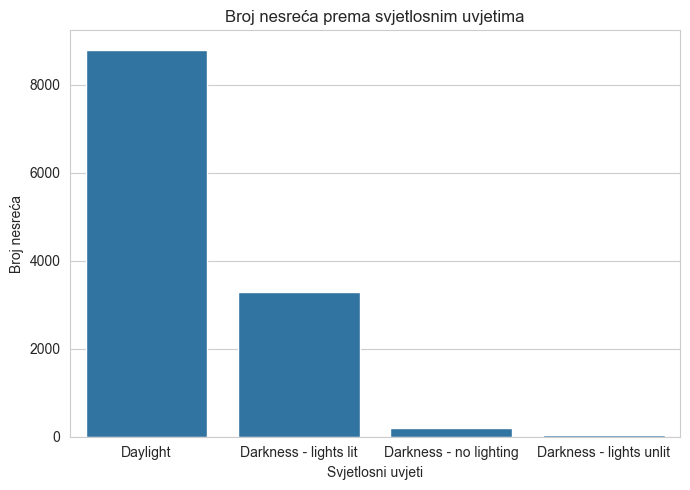

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="Light_conditions"
)
plt.title("Broj nesreća prema svjetlosnim uvjetima")
plt.xlabel("Svjetlosni uvjeti")
plt.ylabel("Broj nesreća")
plt.tight_layout()
plt.show()


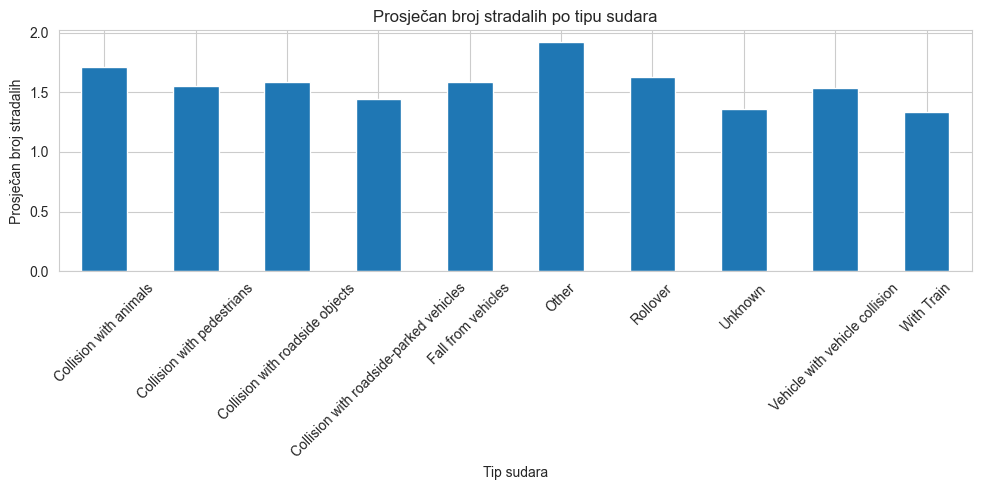

In [57]:
df.groupby("Type_of_collision")["Number_of_casualties"].mean().plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Prosječan broj stradalih po tipu sudara")
plt.xlabel("Tip sudara")
plt.ylabel("Prosječan broj stradalih")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


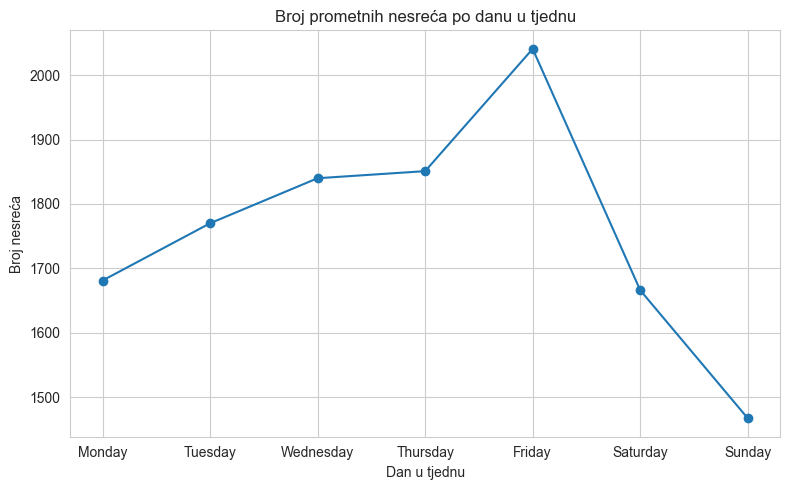

In [58]:
day_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

day_counts = (
    df["Day_of_week"]
    .value_counts()
    .reindex(day_order)
)

plt.figure(figsize=(8,5))
plt.plot(day_counts.index, day_counts.values, marker="o")

plt.title("Broj prometnih nesreća po danu u tjednu")
plt.xlabel("Dan u tjednu")
plt.ylabel("Broj nesreća")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12856\3588898168.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_band_of_driver',


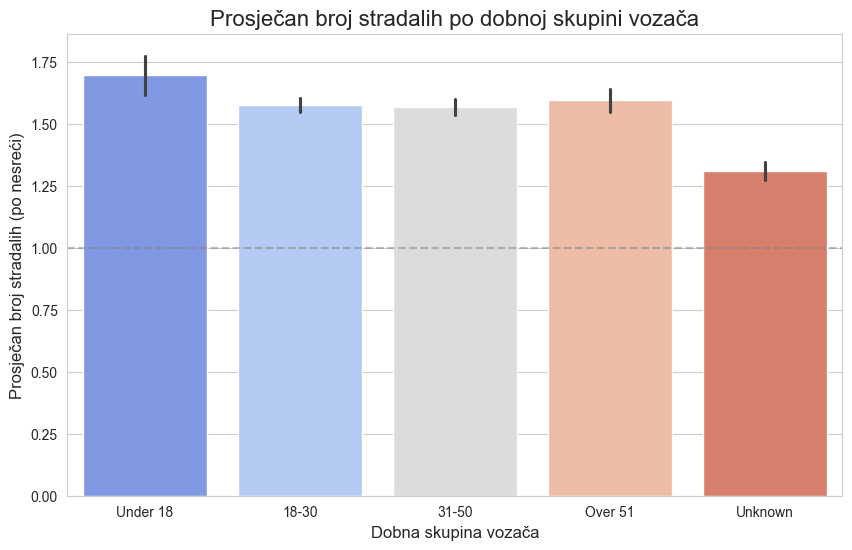

In [59]:
plt.figure(figsize=(10, 6))

redoslijed_dobi = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']

sns.barplot(x='Age_band_of_driver', 
            y='Number_of_casualties', 
            data=df, 
            order=redoslijed_dobi, 
            palette='coolwarm',
            errorbar=('ci', 95)) 

plt.title('Prosječan broj stradalih po dobnoj skupini vozača', fontsize=16)
plt.xlabel('Dobna skupina vozača', fontsize=12)
plt.ylabel('Prosječan broj stradalih (po nesreći)', fontsize=12)

plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

plt.show()

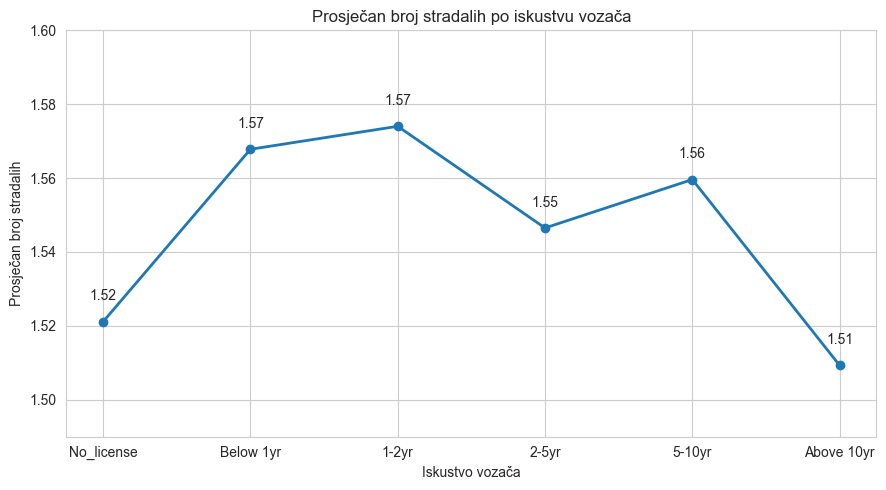

In [60]:
df["Driving_experience_filled"] = df["Driving_experience"].fillna("No_license")
exp_order = ["No_license","Below 1yr","1-2yr","2-5yr","5-10yr","Above 10yr"]

exp_avg = df.groupby("Driving_experience_filled")["Number_of_casualties"].mean().reindex(exp_order)

plt.figure(figsize=(9,5))
plt.plot(exp_avg.index, exp_avg.values, marker="o", linewidth=2, color='tab:blue')

for x, y in zip(exp_avg.index, exp_avg.values):
    plt.text(x, y + 0.005, f"{y:.2f}", ha='center', va='bottom')

plt.title("Prosječan broj stradalih po iskustvu vozača")
plt.xlabel("Iskustvo vozača")
plt.ylabel("Prosječan broj stradalih")
plt.grid(True)

y_min = 1.49      
y_max = 1.6 
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


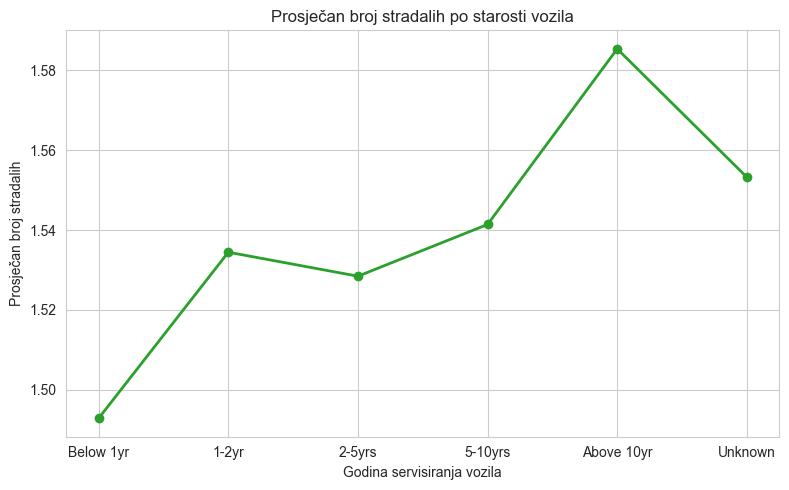

In [61]:
vehicle_age_avg = df.groupby("Service_year_of_vehicle")["Number_of_casualties"].mean()

other_ages = vehicle_age_avg.index[vehicle_age_avg.index != "Below 1yr"]
vehicle_age_avg = vehicle_age_avg.reindex(["Below 1yr"] + list(other_ages))

plt.figure(figsize=(8,5))
plt.plot(vehicle_age_avg.index, vehicle_age_avg.values, marker="o", linewidth=2, color='tab:green')
plt.title("Prosječan broj stradalih po starosti vozila")
plt.xlabel("Godina servisiranja vozila")
plt.ylabel("Prosječan broj stradalih")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_12856\492999411.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Grupa', y='Broj', data=plot_data, palette=colors)


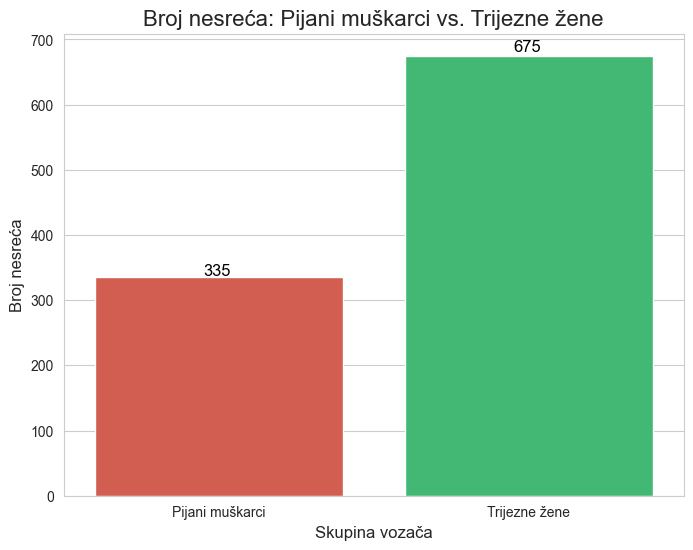

In [98]:
drunk_men_filter = (df['Sex_of_driver'] == 'Male') & \
                   (df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False))

sober_women_filter = (df['Sex_of_driver'] == 'Female') & \
                     (~df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False))

count_drunk_men = df[drunk_men_filter].shape[0]
count_sober_women = df[sober_women_filter].shape[0]

plot_data = pd.DataFrame({
    'Grupa': ['Pijani muškarci', 'Trijezne žene'],
    'Broj': [count_drunk_men, count_sober_women]
})

plt.figure(figsize=(8, 6))

colors = ['#e74c3c', '#2ecc71'] 
ax = sns.barplot(x='Grupa', y='Broj', data=plot_data, palette=colors)

plt.title('Broj nesreća: Pijani muškarci vs. Trijezne žene', fontsize=16)
plt.ylabel('Broj nesreća', fontsize=12)
plt.xlabel('Skupina vozača', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + 0.35, p.get_height() + (p.get_height()*0.01)),
                fontsize=12, color='black')

plt.show()